In [11]:
import pandas as pd
import arff
from scipy.stats import gaussian_kde
from scipy.stats.distributions import uniform
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from arff2pandas import a2p

init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
with open('meta-features.arff') as f:
    df = a2p.load(f)
    #print(ds)

In [4]:
df.head()

,task_id@NUMERIC,AutoCorrelation@NUMERIC,Dimensionality@NUMERIC,MajorityClassPercentage@NUMERIC,MajorityClassSize@NUMERIC,MinorityClassPercentage@NUMERIC,MinorityClassSize@NUMERIC,NumberOfBinaryFeatures@NUMERIC,NumberOfClasses@NUMERIC,NumberOfFeatures@NUMERIC,NumberOfInstances@NUMERIC,NumberOfInstancesWithMissingValues@NUMERIC,NumberOfMissingValues@NUMERIC,NumberOfNumericFeatures@NUMERIC,NumberOfSymbolicFeatures@NUMERIC,PercentageOfBinaryFeatures@NUMERIC,PercentageOfInstancesWithMissingValues@NUMERIC,PercentageOfMissingValues@NUMERIC,PercentageOfNumericFeatures@NUMERIC,PercentageOfSymbolicFeatures@NUMERIC
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.0,0.000000,0.018613,0.027637,0.0,0.0,0.000000,0.15,1.0,0.0,0.0,0.000000,1.000000
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.0,0.244898,0.007332,0.199897,0.0,0.0,0.009009,0.00,0.0,0.0,0.0,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.0,0.010204,0.000564,0.001281,0.0,0.0,0.002252,0.00,0.0,0.0,0.0,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.120135,0.015377,0.0,0.0,0.121622,0.00,0.0,0.0,0.0,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.041173,0.015377,0.0,0.0,0.042793,0.00,0.0,0.0,0.0,0.987569,0.012431


In [5]:
# Rename all the columns without the @ thing

df = df.rename(columns={col: col.split('@')[0] for col in df.columns})


In [6]:
df.head()

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.0,0.000000,0.018613,0.027637,0.0,0.0,0.000000,0.15,1.0,0.0,0.0,0.000000,1.000000
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.0,0.244898,0.007332,0.199897,0.0,0.0,0.009009,0.00,0.0,0.0,0.0,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.0,0.010204,0.000564,0.001281,0.0,0.0,0.002252,0.00,0.0,0.0,0.0,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.120135,0.015377,0.0,0.0,0.121622,0.00,0.0,0.0,0.0,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.0,0.081633,0.041173,0.015377,0.0,0.0,0.042793,0.00,0.0,0.0,0.0,0.987569,0.012431


In [18]:
df

,task_id,AutoCorrelation,Dimensionality,MajorityClassPercentage,MajorityClassSize,MinorityClassPercentage,MinorityClassSize,NumberOfBinaryFeatures,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,PercentageOfBinaryFeatures,PercentageOfInstancesWithMissingValues,PercentageOfMissingValues,PercentageOfNumericFeatures,PercentageOfSymbolicFeatures
0,3.0,0.999114,0.005043,0.547202,0.031904,0.954720,0.032910,1.000000,0.000000,0.018613,0.027637,0.00000,0.000000,0.000000,0.150000,1.000000,0.000000,0.000000,0.000000,1.000000
1,6.0,0.040904,0.000335,0.032744,0.015383,0.055683,0.015752,0.000000,0.244898,0.007332,0.199897,0.00000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.941706,0.058294
2,11.0,0.697152,0.003473,0.481591,0.005250,0.140678,0.000930,0.000000,0.010204,0.000564,0.001281,0.00000,0.000000,0.002252,0.000000,0.000000,0.000000,0.000000,0.800450,0.199550
3,12.0,0.995550,0.047583,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.120135,0.015377,0.00000,0.000000,0.121622,0.000000,0.000000,0.000000,0.000000,0.995952,0.004048
4,14.0,0.995550,0.016860,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.041173,0.015377,0.00000,0.000000,0.042793,0.000000,0.000000,0.000000,0.000000,0.987569,0.012431
5,15.0,0.631838,0.006241,0.689293,0.008531,0.683621,0.005085,0.028571,0.000000,0.003384,0.002040,0.00032,0.000002,0.005068,0.000000,0.105714,0.022890,0.003289,0.900507,0.099493
6,16.0,0.995550,0.014226,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.034405,0.015377,0.00000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.985170,0.014830
7,18.0,0.995550,0.001498,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.001692,0.015377,0.00000,0.000000,0.003378,0.000000,0.000000,0.000000,0.000000,0.857625,0.142375
8,20.0,0.995550,0.052850,0.096147,0.003551,0.184704,0.004198,0.000000,0.081633,0.133672,0.015377,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,21.0,0.599337,0.001740,0.737377,0.023045,0.057549,0.001277,0.000000,0.020408,0.001692,0.012588,0.00000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000


In [19]:
df.columns

Index(['task_id', 'AutoCorrelation', 'Dimensionality',
       'MajorityClassPercentage', 'MajorityClassSize',
       'MinorityClassPercentage', 'MinorityClassSize',
       'NumberOfBinaryFeatures', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'PercentageOfBinaryFeatures',
       'PercentageOfInstancesWithMissingValues', 'PercentageOfMissingValues',
       'PercentageOfNumericFeatures', 'PercentageOfSymbolicFeatures'],
      dtype='object')

### KMeans Clustering

(5, 19)
(99,)
(99,)


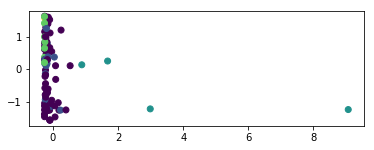

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#X, y = make_blobs(centers=4, random_state=1)
X_df = df[[ 'AutoCorrelation', 'Dimensionality',
       'MajorityClassPercentage', 'MajorityClassSize',
       'MinorityClassPercentage', 'MinorityClassSize',
       'NumberOfBinaryFeatures', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'PercentageOfBinaryFeatures',
       'PercentageOfInstancesWithMissingValues', 'PercentageOfMissingValues',
       'PercentageOfNumericFeatures', 'PercentageOfSymbolicFeatures']]
minmax = MinMaxScaler(feature_range=(0,1))
standard_sc = StandardScaler()
X = X_df.values

X = standard_sc.fit_transform(X)
X_sc = X
km = KMeans(n_clusters=5, random_state=0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X).shape)
plt.scatter(X[:, 1], X[:, 2], c=km.labels_)
plt.gca().set_aspect("equal")

In [29]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.07416666666666667).fit(X_sc)
pred_ee = ee.predict(X_sc)
print(pred_ee)
print("Predicted proportion of outliers in the data using Elliptic Envelope: ", np.mean(pred_ee == -1))

/rigel/home/aaj2146/.conda/envs/myenv/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:646: UserWarning:

The covariance matrix associated to your dataset is not full rank



[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1
  1  1 -1]
Predicted proportion of outliers in the data using Elliptic Envelope:  0.08080808080808081


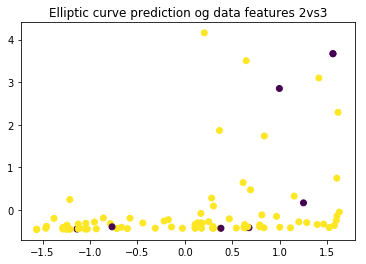

In [30]:
plt.title("Elliptic curve prediction og data features 2vs3")
plt.scatter(X_sc[:, 2], X_sc[:, 3], c=pred_ee)

In [ ]:
# Use Power Transformer
# Check if the clusters 

In [31]:
# Getting PCA version of the data

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)

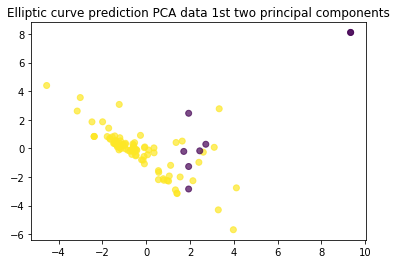

In [32]:
plt.title("Elliptic curve prediction PCA data 1st two principal components")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_ee, alpha = 0.7)

In [33]:
from sklearn.manifold import TSNE
#from sklearn.datasets import load_digits
#digits = load_digits()
#X = digits.data / 16.
X_tsne = TSNE().fit_transform(X_sc)

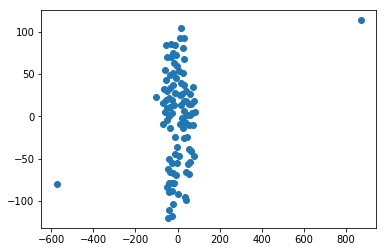

In [34]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

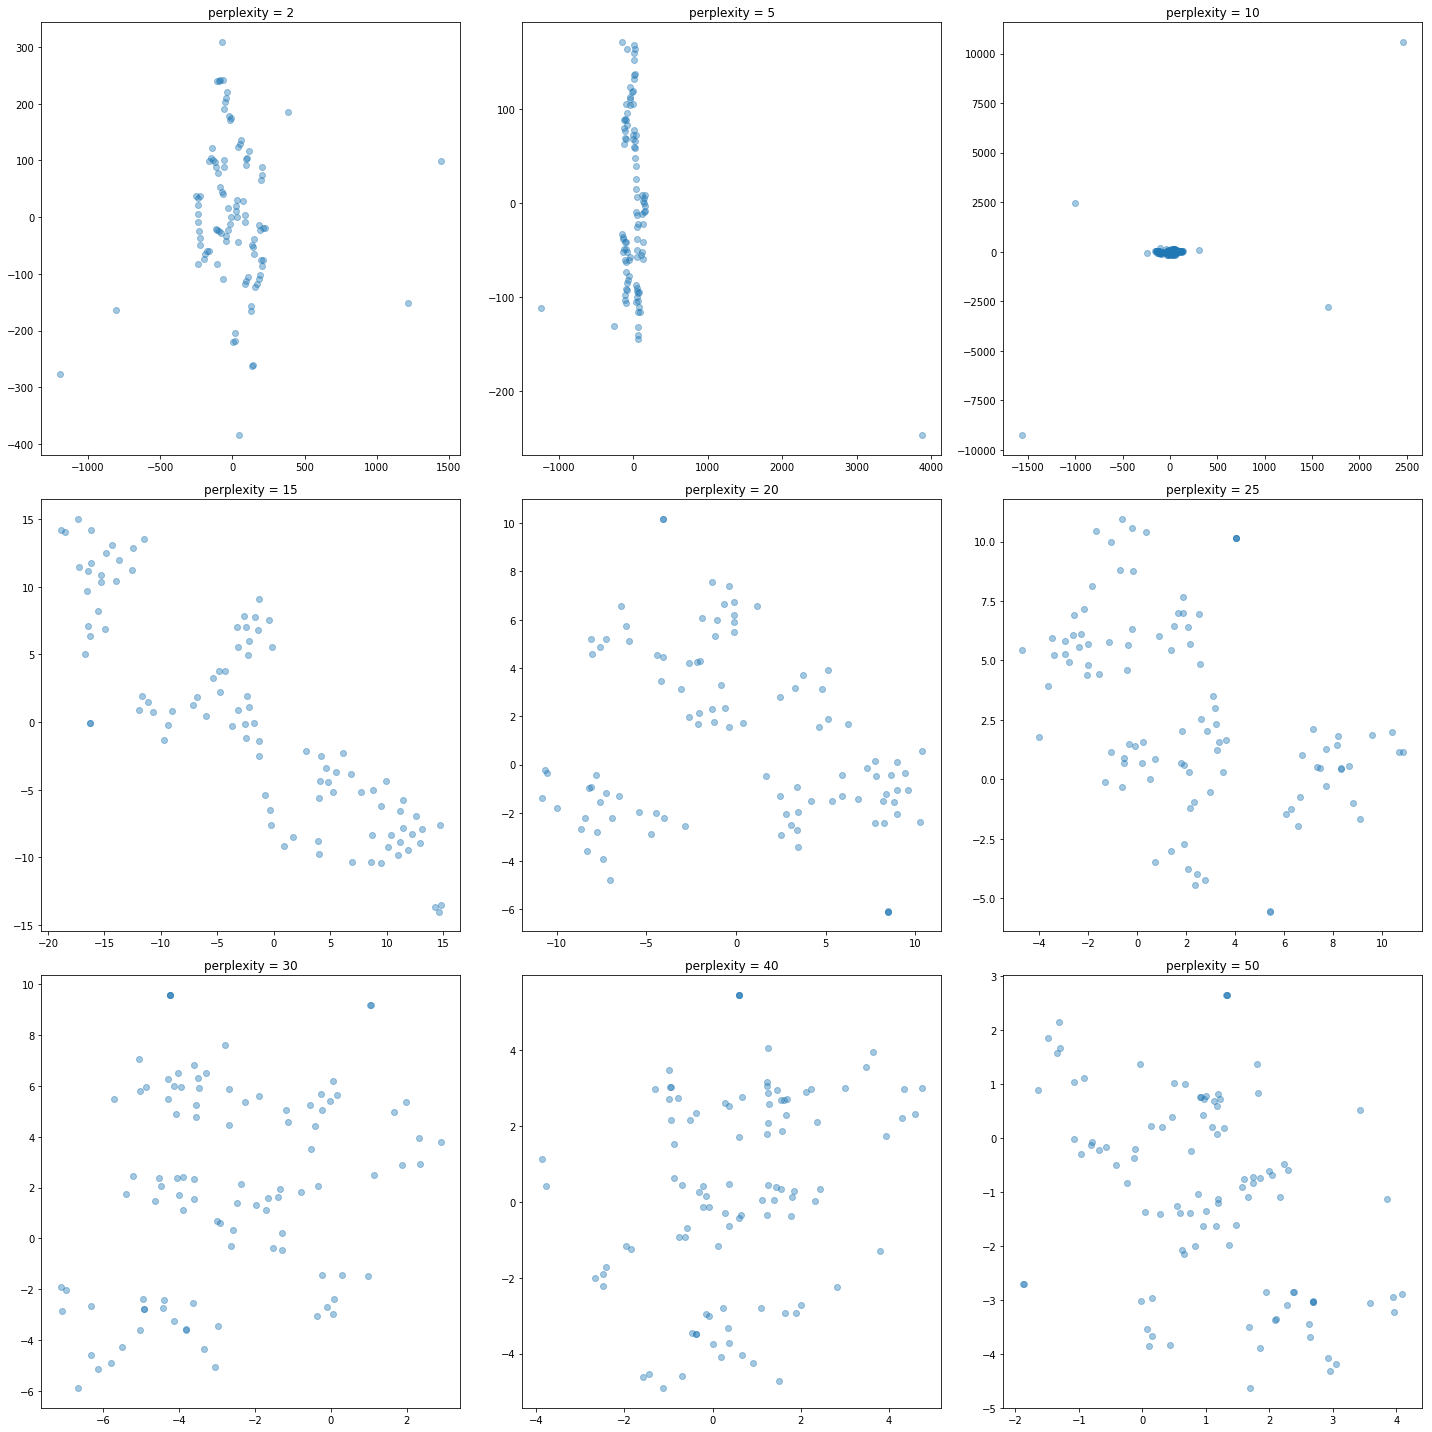

In [36]:
perplexity = [2,5,10,15,20,25,30,40,50]
p = 0
fig,ax = plt.subplots(3,3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        all_data_sc_tsne = TSNE(perplexity=perplexity[p]).fit_transform(X_sc)
        ax[i,j].scatter(all_data_sc_tsne[:, 0], all_data_sc_tsne[:, 1],alpha = 0.7)
        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.show()

#### We can see three clusters (qualitatively)

In [42]:
#DBSCAN
import itertools    
from sklearn.cluster import DBSCAN
db_dict = {}
eps = [1,1.5,2,2.5,3]
min_samples = [2,3,4,5,6]
for i in eps:
    for j in min_samples:
        db = DBSCAN(eps=i, min_samples=j).fit(X_sc)
        #print('No. of Noise Points')
        #print('eps = ',i,' and min_samples = ',j,' ',sum(db.labels_ ==-1))
        #print('No. of non noise and non zero class:')
        #print('eps = ',i,' and min_samples = ',j,' ',sum(db.labels_ !=0)-sum(db.labels_ ==-1))
        #print(set(db.labels_))
        db_dict['db'+str(i)+str(j)]=db

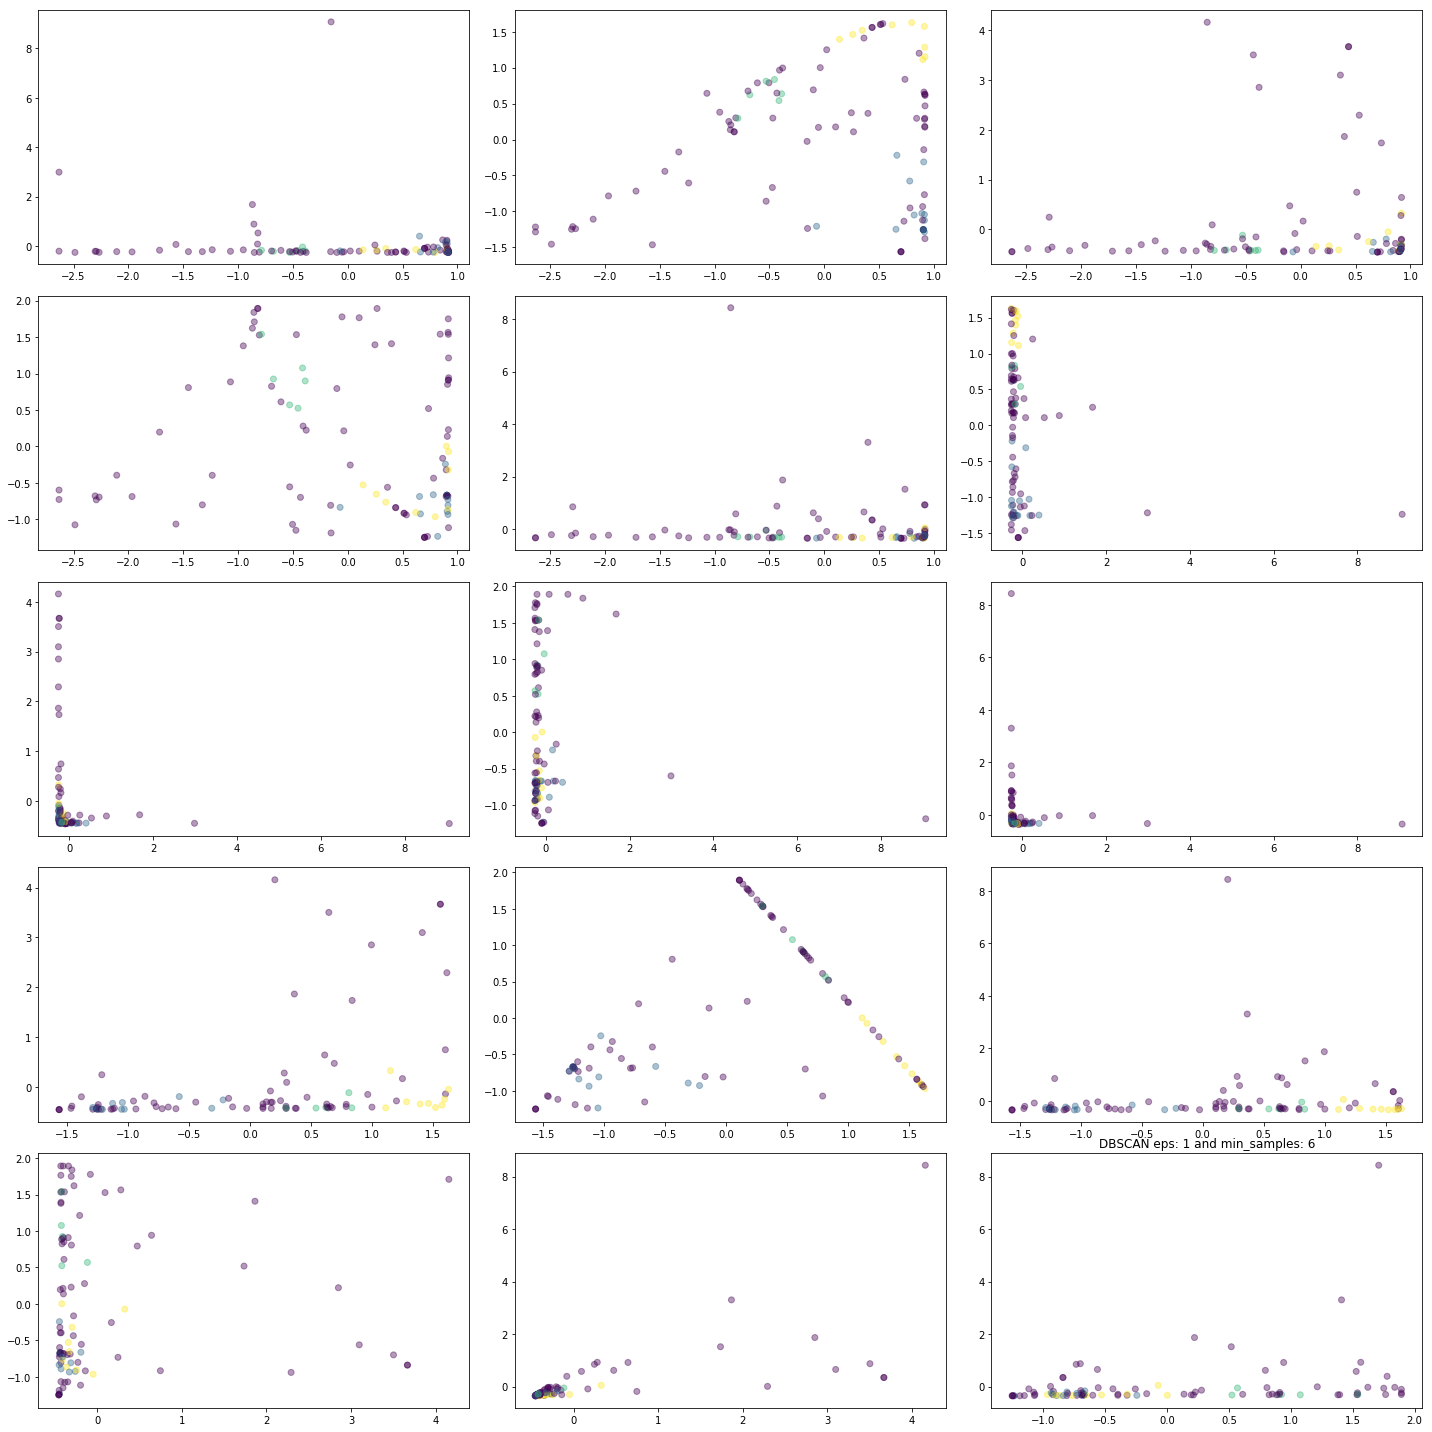

In [43]:
#DBSCAN with eps=1 and min_samples = 6
comb = []
for i in itertools.combinations(range(6), 2):
    comb.append(i)
all_data_scaled = X_sc
p = 0
fig,ax = plt.subplots(5,3, figsize=(20,20))
for i in range(5):
    for j in range(3):
        ax[i,j].scatter(all_data_scaled[:, comb[p][0]], all_data_scaled[:, comb[p][1]],
                        c=db_dict['db16'].labels_,alpha = 0.4)
#        ax[i,j].set_title('perplexity = '+str(perplexity[p]))
        p+=1
plt.tight_layout()
plt.title('DBSCAN eps: 1 and min_samples: 6')
plt.show()
